[![Binder](https://mybinder.org/badge_logo.svg)](https://gesis.mybinder.org/binder/v2/gh/kleiolab/analysis-public/eb24acd23ee747075dd214448c265fc62eb3f840)

## Librairies

In [2]:
import json
import pprint
from collections import Counter
from operator import itemgetter
import csv
import matplotlib.pyplot as plt

In [3]:
# https://github.com/drgrib/dotmap
from dotmap import DotMap

In [4]:
import jdcal as jd
import datetime


In [5]:
import pandas as pd

## Ourvir et inspecter le fichier

In [6]:
file = 'geovistory_query_exports/Person_basic_view-20210217.json'
# file = 'geovistory_query_exports/Person_basic_view-1588325117126.json'

In [7]:
with open(file) as json_file:
    data = json.load(json_file)
type(data)    

dict

In [8]:
[print(a) for a in data]

columns
rows


[None, None]

In [9]:
# number of rows in the file - create a list
rows = data['rows']
len(rows)

1984

In [10]:
columns = data['columns']
pprint.pprint(columns)

{'col_0': 'Entity Preview',
 'col_1': 'Real identity',
 'col_10': 'Occupation',
 'col_11': 'Enquiry',
 'col_12': 'Witness',
 'col_2': 'Gender',
 'col_3': 'Birth',
 'col_4': 'Place of birth',
 'col_5': 'Origin',
 'col_6': 'Origin Place',
 'col_7': "Father's occupation",
 'col_8': 'Names',
 'col_9': 'Social character'}


In [11]:
[pprint.pprint(r) for r in rows[99:101]]

{'col_0': {'entity': {'class_label': 'Person',
                      'entity_label': 'Giuseppina moglie di Marco De '
                                      'Franceschi',
                      'entity_type': 'peIt',
                      'fk_class': 21,
                      'fk_project': 591,
                      'pk_entity': 754631,
                      'project': 591,
                      'tmsp_last_modification': '2021-01-22T08:25:05.362183+00:00'}},
 'col_1': {'entities': []},
 'col_10': {'entities': []},
 'col_11': {'entities': []},
 'col_12': {'entities': [{'class_label': 'Pre-matrimonial enquiry',
                          'entity_label': 'Pasqua di Gregorio Celodo (da Santa '
                                          'Lucia)',
                          'entity_type': 'teEn',
                          'first_second': 198952502400,
                          'fk_class': 631,
                          'fk_project': 591,
                          'last_second': 198952588799,
    

[None, None]

In [12]:
dm_data = DotMap(data)

In [13]:
dm_r = dm_data.rows

In [14]:
### number of persons
len(dm_r)

1984

### Gender

In [ ]:
[r.col_2.entities[0].entity_label if r.col_2 else 'missing' for r in dm_r[0:5]]

In [ ]:
gl = [r.col_2.entities[0].entity_label if r.col_2.entities else 'missing' for r in dm_r]
print(gl[101:107])
len(gl)

In [ ]:
D = dict(Counter(gl))
print(D)
len(D)

In [ ]:
plt.bar(range(len(D)), list(D.values()), align='center', width=0.7)
plt.xticks(range(len(D)), list(D.keys()))
plt.show()

## Age by category

In [15]:
[pprint.pprint(r) for r in rows[50:100]]

{'col_0': {'entity': {'class_label': 'Person',
                      'entity_label': 'Pasquale di Maffeo De Savionibus '
                                      '(musico)',
                      'entity_type': 'peIt',
                      'fk_class': 21,
                      'fk_project': 591,
                      'pk_entity': 748916,
                      'project': 591,
                      'tmsp_last_modification': '2021-01-22T08:25:05.362183+00:00'}},
 'col_1': {'entities': []},
 'col_10': {'entities': []},
 'col_11': {'entities': [{'class_label': 'Pre-matrimonial enquiry',
                          'entity_label': 'Pasquale di Maffeo De Savionibus '
                                          '(musico)',
                          'entity_type': 'teEn',
                          'first_second': 198951897600,
                          'fk_class': 631,
                          'fk_project': 591,
                          'last_second': 198951983999,
                          'pk_ent

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:
def get_entities_JD(entities):
    result = []
    for e in entities:
        if e.time_span.p82.julianDay:
            result.append({'pk_teen' : e.pk_entity, 'JD' : e.time_span.p82.julianDay})
        elif e.time_span.p81a.julianDay:
            result.append({'pk_teen' : e.pk_entity, 'JD' : e.time_span.p81a.julianDay})
        elif e.time_span.p82a.julianDay:
            result.append({'pk_teen' : e.pk_entity, 'JD' : e.time_span.p82a.julianDay})
        else:
            result.append(None)

    return result

def get_entities_label(entities):
    result = []
    for e in entities:
        if e.entity_label:
            result.append(e.entity_label)
        else:
            result.append(None)

    return result

In [17]:
ageOccupationProcessetto = []
for r in dm_r: #[299:303]:
    
    ## person identifier
    pk_entity = r.col_0.entity.pk_entity

    ## births
    birthsJD = get_entities_JD(r.col_3.entities)
    
    ## occupations, join the labels    
    occupations = ','.join([e.entity_label for e in r.col_10.entities])
    
    ## occupations, list 
    occupations_l = get_entities_label(r.col_10.entities)
    
    ## enquiries, get begin date
    enquiries = get_entities_JD(r.col_11.entities)

    ## witnesses, get begin date
    witnesses =  get_entities_JD(r.col_12.entities)
                
    ageOccupationProcessetto.append([pk_entity, birthsJD, occupations_l, enquiries, witnesses])               
    
    
    


In [18]:
pprint.pprint(ageOccupationProcessetto[50:100])

[[748916, [], [], [{'JD': 2302684, 'pk_teen': 837319}], []],
 [748929,
  [{'JD': 2286100, 'pk_teen': 749185}],
  ['fisico'],
  [],
  [{'JD': 2302684, 'pk_teen': 837319}]],
 [748962, [], [], [], [{'JD': 2302684, 'pk_teen': 749101}]],
 [748988, [], [], [{'JD': 2302684, 'pk_teen': 749101}], []],
 [749003, [], [], [], []],
 [749019,
  [{'JD': 2292309, 'pk_teen': 749074}],
  ['fachin'],
  [{'JD': 2304360, 'pk_teen': 754435}],
  []],
 [749052,
  [{'JD': 2296692, 'pk_teen': 749127}],
  ['galiner'],
  [],
  [{'JD': 2304902, 'pk_teen': 749080}]],
 [749143,
  [{'JD': 2280987, 'pk_teen': 749168}],
  ['impenditor'],
  [],
  [{'JD': 2304360, 'pk_teen': 754435}]],
 [749208,
  [{'JD': 2290483, 'pk_teen': 749271}],
  ['fachin'],
  [],
  [{'JD': 2304360, 'pk_teen': 754435}]],
 [749635,
  [{'JD': 2294136, 'pk_teen': 749690}],
  [],
  [{'JD': 2304362, 'pk_teen': 754466}],
  []],
 [749731,
  [{'JD': 2290118, 'pk_teen': 750030}],
  ['fator', 'scrivan de nave'],
  [{'JD': 2302684, 'pk_teen': 749921}],
  []]

In [19]:
### age au moment du processetto et métier
dateBirthEnquiryOccupation = []
for l in ageOccupationProcessetto: #[50:70]:
    if l[1] and l[3]:
        if l[1][0] and l[3][0]:
            d = [jd.jd2jcal((l[1][0]['JD']),0)[0:3],jd.jd2jcal((l[3][0]['JD']),0)[0:3]]
            if l[2]:
                dateBirthEnquiryOccupation.append(d + [l[2]])
            else:    
                dateBirthEnquiryOccupation.append(d )
    else:
        dateBirthEnquiryOccupation.append(None)

    

In [20]:
ages = [(y[1][0] - y[0][0]) for y in dateBirthEnquiryOccupation if y]
print(ages[:5])

[27, 25, 22, 27, 22]


In [21]:
s_ages = pd.Series(ages)
s_ages.describe()

count    500.000000
mean      27.000000
std        6.886425
min        7.000000
25%       22.000000
50%       26.000000
75%       30.000000
max       70.000000
dtype: float64

In [22]:
std = s_ages.sort_values()
type(std)

pandas.core.series.Series

In [23]:
# agesCount
agesCount = pd.DataFrame(s_ages, columns=['column']).groupby(['column']).size()
# print(type(agesCount))
# agesCount.index

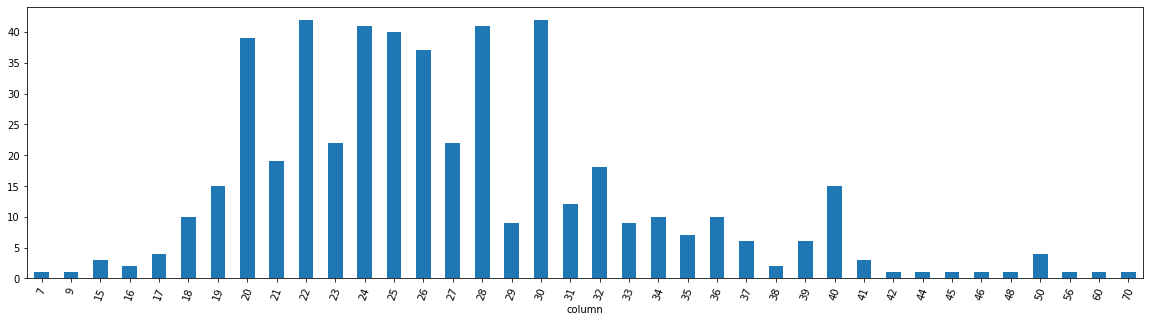

In [24]:
ax = agesCount.plot.bar(x='lab', y='val', rot=70, figsize=(20,5))